## 의사결정트리
- 어떤 규칙을 하나의 트리 형태로 표현한 후 분류나 회귀 문제를 해결하는 것
- ***어떤 기준으로 노드를 구성할지가*** 가장 중요(분할 속성)
- 어떤 분할 속성이 가장 모호함을 줄일지 : 깊이가 너무 깊어지지 않게
- 테이블형 데이터에 있어서 효과 Good
- 마지막 노드 : 클래스(in 분류)나 예측치(in 회귀)
- 상위의 부모 노드 : if-else문의 조건에 해당하는 정보

### 엔트로피
: 어떤 목적 달성을 위한 경우의 수를 정량적으로 표현하는 수치
- 낮은 엔트로피 : 경우의 수가 적음 --> 낮은 불확실성
- 높은 엔트로피 : 경우의 수가 많음 --> 높은 불확실성
- --> 엔트로피가 작다면 우리가 얻을 수 있는 정보가 많으면서 확실함.
- --> **낮은 엔트로피를 찾는 것이 목적**
- 샤논 공식 사용

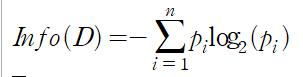

## 의사결정트리 알고리즘
### 정보이득
: 엔트로피를 사용하여 속성별 분류 시 데이터가 얼마나 순수한지를 측정하는 지표
- 전체 엔트로피 - 속성별 엔트로피 = 속성별 정보 이득
- 정보이득이 큰 것 --> 첫 번째 가지 속성으로 선택

전체 엔트로피 

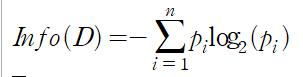

속성별 엔트로피 : 속성 A로 데이터를 분류했을 때, 속성 A가 가진 모든 클래스의 각 엔트로피를 계산한 후, 데이터의 개수만큼 가중치를 줌

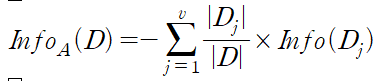

속성별 정보 이득
- 정보 이득이 클수록 얻을 수 있는 정보량이 많음
- 엔트로피가 작다면 해당 속서을 기준으로 데이터를 나누기 좋다고 볼 수 있음

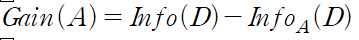

### 특징
- 재귀적 작동 : 가지 선택 후 남은 속성으로 다음 가지 선택
- 속성 기준으로 가지치기 수행
- 중요한 속성 정보 제공 --> 해석 가능한 머신러닝

### ID3 알고리즘
: 반복적으로 데이터를 나누는 알고리즘
- 성장 : 일반적으로 의사결정트리를 생성하는 방법
- 톱다운 방식으로 데이터를 나누며 최적화를 추진
- 각 속성별 정보 이득을 통해 데이터 분류 기준을 정해야 함

## 정보이득의 문제점
: 속성의 값이 다양할수록 선택의 확률이 높아지는 문제 발생
- 단순히 데이터가 매우 많아도 속성이 다양할 때 엔트로피가 낮아져 정보 이득이 높아짐

## C4.5 알고리즘
: 정보 이득을 측정하는 방식을 좀 더 평준화, 단순한 정보 값 대신 사용
- 분모에 SplitInfo 추가

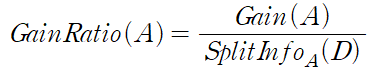

## 지니 지수
- 각 속성의 불순도를 측정하는 방법 : 작을수록 좋은 것
- 이진 분할 실시 : 데이터를 1개의 속성과 나머지로 분류

## 의사결정트리 알고리즘의 다양한 변형
- 트리 가지치기 
: 마지막 노드의 개수를 지정하여 트리의 깊이를 조정
- - 사전 가지치기 : 사전에 입력, 과소적합 문제 발생 가능
- - 사후 가지치기 : 직접 하이퍼 매개변수를 조정하며 최적의 값 찾기, 훈련셋, 검증셋, 테스트셋으로 분류 후 성능 비교

- 연속형 변수 나누기 : Y 클래스 값을 기준으로 해당 값이 변할 때를 기준점으로 삼아 분기
- 회귀 트리 : Y 클래스 값이 연속형 변수일 때
- - 각 군집의 평균값 도출
- - 오차가 가장 낮을 때가 상위 지점이 됨

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np

pd_data = pd.read_csv('/content/drive/MyDrive/source/ch12/vegeterianl_dataset.csv', delimiter=r'\s+')
pd_data.drop('ID', axis=1)

,STREAM,SLOPE,ELEVATION,VEGETATION
0,False,steep,3900,chapparal
1,True,moderate,300,riparian
2,True,steep,1500,riparian
3,False,steep,1200,chapparal
4,False,flat,4450,conifer
5,True,steep,5000,conifer
6,True,steep,3000,chapparal


In [2]:
pd_data.sort_values('ELEVATION') # ELEVATION 을 기준으로 데이터 정렬

,ID,STREAM,SLOPE,ELEVATION,VEGETATION
1,2,True,moderate,300,riparian
3,4,False,steep,1200,chapparal
2,3,True,steep,1500,riparian
6,7,True,steep,3000,chapparal
0,1,False,steep,3900,chapparal
4,5,False,flat,4450,conifer
5,6,True,steep,5000,conifer


#### Y 클래스 : VEGETATION 의 라벨이 바뀌는 구간

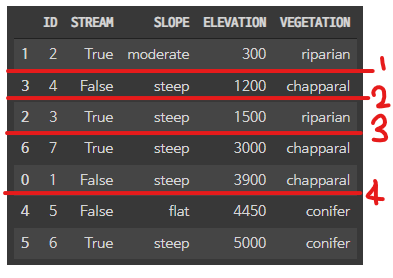

- 구간별 경계 평균값으로 데이터를 자름
- 경계값 기준으로 엔트로피 산출
- ele750(0.3059), ele1350(0.1813), ele2250(0.5916), ele4175(0.863)

In [6]:
pd_data = pd.read_csv('http://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data = pd_data.drop('RID', axis=1)

In [7]:
# y 값의 클래스를 기준으로 엔트로피 연산 실시

def get_info(df):
  buy = df.loc[df['class_buys_computer']=='yes']
  not_buy = df.loc[df['class_buys_computer']=='no']
  x = np.array([len(buy)/len(df), len(not_buy)/len(df)])
  y = np.log2(x[x!=0])

  info_all = -sum(x[x!=0] * y)
  return info_all

In [8]:
get_info(pd_data)

0.9402859586706309

In [10]:
# 속성별 정보이득

youth = pd_data.loc[pd_data['age'] == 'youth']
senior = pd_data.loc[pd_data['age'] == 'senior']
middle_aged = pd_data.loc[pd_data['age'] == 'middle_aged']

In [11]:
get_info(youth)

0.9709505944546686

In [12]:
get_info(senior)

0.9709505944546686

In [13]:
get_info(middle_aged)

-0.0

In [14]:
# 정보이득

def get_attribute_info(df, attribute_name):
  attribute_values = pd_data[attribute_name].unique()
  get_infos = []
  for value in attribute_values:
    split_df = pd_data.loc[pd_data[attribute_name] == value]
    get_infos.append((len(split_df) / len(df)) * get_info(split_df))

  return sum(get_infos)

In [15]:
get_attribute_info(pd_data, 'age')

0.6935361388961918

In [16]:
get_info(pd_data) - get_attribute_info(pd_data, 'age') # 가장 큼

0.2467498197744391

In [17]:
get_info(pd_data) - get_attribute_info(pd_data, 'income')

0.029222565658954647

In [18]:
get_info(pd_data) - get_attribute_info(pd_data, 'student')

0.15183550136234136

In [19]:
get_info(pd_data) - get_attribute_info(pd_data, 'credit_rating')

0.04812703040826927

In [20]:
youth = pd_data.loc[pd_data['age'] == 'youth']
get_info(youth) - get_attribute_info(youth, 'income')

-1.580026905978025

In [21]:
get_info(youth) - get_attribute_info(youth, 'student')

-1.2367106860085422

In [22]:
get_info(youth) - get_attribute_info(youth, 'credit_rating') # 재귀적

-1.527094404679944

In [25]:
# 데이터 불러오기

train_df = pd.read_csv('/content/drive/MyDrive/source/ch12/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/source/ch12/test.csv')

train_id = train_df['PassengerId'].values
test_id = test_df['PassengerId'].values

all_df = train_df.append(test_df).set_index('PassengerId')

In [26]:
# 데이터 전처리

all_df['Sex'] = all_df['Sex'].replace({'male':0, 'female':1})

all_df['Age'].fillna(all_df.groupby('Pclass')['Age'].transform('mean'), inplace=True)

In [29]:
all_df['cabin_count'] = all_df['Cabin'].map(lambda x : len(x.split()) if type(x) == str else 0)

In [30]:
def transform_status(x):
  if 'Mrs' in x or 'Ms' in x:
    return 'Mrs'
  elif 'Mr' in x:
    return 'Mr'
  elif 'Miss' in x:
    return 'Miss'
  elif 'Dr' in x:
    return 'Dr'
  elif 'Rev' in x:
    return 'Rev'
  elif 'Col' in x:
    return 'Col'
  else:
    return '0'

all_df['social_status'] = all_df['Name'].map(lambda x : transform_status(x))

In [31]:
all_df['social_status'].value_counts()

Mr      758
Miss    258
Mrs     203
0        69
Dr        9
Rev       8
Col       4
Name: social_status, dtype: int64

In [32]:
# 사용하지 않는 데이터 삭제

all_df[all_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


In [33]:
all_df = all_df.drop([62,830])
train_id = np.delete(train_id, [62-1, 830-1])

In [34]:
all_df[all_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [35]:
all_df.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [36]:
all_df.loc[all_df['Fare'].isnull(), 'Fare'] = 12.415462

In [37]:
all_df['cabin_type'] = all_df['Cabin'].map(lambda x: x[0] if type(x) == str else '99')

In [38]:
del all_df['Cabin']
del all_df['Name']
del all_df['Ticket']

In [39]:
y = all_df.loc[train_id, 'Survived'].values
del all_df['Survived']

In [40]:
X_df = pd.get_dummies(all_df)
X = X_df.values

In [41]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [42]:
# 학습
X_train = X[:len(train_id)]
X_test = X[:len(train_id)]

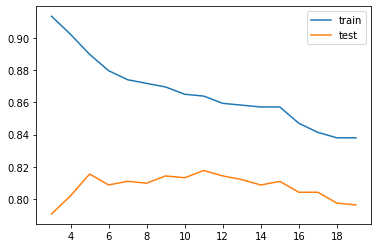

In [45]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

test_accuracy = []
train_accuracy = []
for idx in range(3,20):
  df = DecisionTreeClassifier(min_samples_leaf=idx)
  train_accuracy.append(accuracy_score(df.fit(X_train, y).predict(X_train), y))
  acc = cross_val_score(df, X_train, y, scoring='accuracy', cv=5).mean()
  test_accuracy.append(acc)

result = pd.DataFrame(train_accuracy, index=range(3,20), columns=['train'])
result['test'] = test_accuracy

result.plot()

# 11에서 가장 높은 정확도 그 이후 떨어짐:과대적합